<a href="https://colab.research.google.com/github/lagamaite/CSC-522-P30/blob/main/Fashion_MNIST_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.losses import CategoricalCrossentropy, SparseCategoricalCrossentropy
from sklearn.model_selection import KFold
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau, ModelCheckpoint
import matplotlib.pyplot as plt1
import numpy as np

In [7]:
def load_fashion_mnist():
  (train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()
  train_images = train_images.reshape((len(train_images), 28, 28, 1))
  test_images = test_images.reshape((len(test_images), 28, 28, 1))
  train_labels = to_categorical(train_labels)
  test_labels = to_categorical(test_labels)
  return train_images, train_labels, test_images, test_labels

def normalize(train_images, test_images):
  x_train = train_images.astype('float32')
  x_test = test_images.astype('float32')
  x_train /= 255.0
  x_test /= 255.0
  return x_train, x_test

def CNN_model():
  model = Sequential()
  model.add(Conv2D(32, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(Conv2D(64, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(Dropout(0.25))
  model.add(Conv2D(128, kernel_size=(3, 3), padding='same', activation='relu', kernel_initializer='he_uniform', input_shape=(28, 28, 1)))
  model.add(BatchNormalization())
  model.add(MaxPooling2D((2, 2)))
  model.add(Dropout(0.25))
  model.add(Flatten())
  model.add(Dense(256, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(128, activation='relu'))
  model.add(BatchNormalization())
  model.add(Dropout(0.3))
  model.add(Dense(10, activation='softmax'))
  model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  return model


In [8]:
my_callbacks = [
    ReduceLROnPlateau(factor=0.5, patience=3, min_lr=0.00001, verbose=1),
    ModelCheckpoint(filepath = 'my_model.h5', 
    verbose=1, save_best_only=True, save_weights_only=False) 
    ]

In [9]:
train_images, train_labels, test_images, test_labels = load_fashion_mnist()
x_train, x_test = normalize(train_images, test_images)
cnn = CNN_model()
history = cnn.fit(x_train, train_labels, epochs=20, verbose=1, validation_data=(x_test, test_labels), batch_size=64, callbacks=my_callbacks)

Epoch 1/20
938/938 [==============================] - 16s 16ms/step - loss: 0.5585 - accuracy: 0.8060 - val_loss: 0.3216 - val_accuracy: 0.8931

Epoch 00001: val_loss improved from inf to 0.32161, saving model to my_model.h5
Epoch 2/20
938/938 [==============================] - 15s 16ms/step - loss: 0.2765 - accuracy: 0.9021 - val_loss: 0.2559 - val_accuracy: 0.9138

Epoch 00002: val_loss improved from 0.32161 to 0.25585, saving model to my_model.h5
Epoch 3/20
938/938 [==============================] - 15s 16ms/step - loss: 0.2151 - accuracy: 0.9216 - val_loss: 0.3376 - val_accuracy: 0.9045

Epoch 00003: val_loss did not improve from 0.25585
Epoch 4/20
938/938 [==============================] - 15s 15ms/step - loss: 0.1875 - accuracy: 0.9328 - val_loss: 0.3109 - val_accuracy: 0.9162

Epoch 00004: val_loss did not improve from 0.25585
Epoch 5/20
938/938 [==============================] - 15s 16ms/step - loss: 0.1616 - accuracy: 0.9404 - val_loss: 1.0355 - val_accuracy: 0.8844

Epoch 000

In [5]:
from google.colab import files
files.download('my_model.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

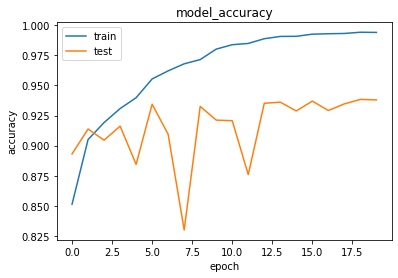

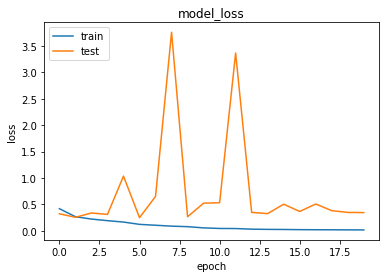

In [11]:
plt1.plot(history.history['accuracy'])
plt1.plot(history.history['val_accuracy'])
plt1.title('model_accuracy')
plt1.ylabel('accuracy')
plt1.xlabel('epoch')
plt1.legend(['train', 'test'], loc='upper left')
plt1.show()

plt1.plot(history.history['loss'])
plt1.plot(history.history['val_loss'])
plt1.title('model_loss')
plt1.ylabel('loss')
plt1.xlabel('epoch')
plt1.legend(['train', 'test'], loc='upper left')
plt1.show()